In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv("age_gender.csv")
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [45]:
data["gender"]

0        0
1        0
2        0
3        0
4        0
        ..
23700    1
23701    1
23702    1
23703    1
23704    1
Name: gender, Length: 23705, dtype: int64

In [46]:
data2 = data.drop('img_name' , axis=1)
data2.head()

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [47]:
X = data["pixels"]
Y = data["gender"]

In [48]:
X.head()

0    129 128 128 126 127 130 133 135 139 142 145 14...
1    164 74 111 168 169 171 175 182 184 188 193 199...
2    67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3    193 197 198 200 199 200 202 203 204 205 208 21...
4    202 205 209 210 209 209 210 211 212 214 218 21...
Name: pixels, dtype: object

In [49]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: gender, dtype: int64

In [80]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
age_counts = data2["gender"].value_counts()

# To provide  set of color palettes  mate
colors = px.colors.qualitative.Pastel


fig = go.Figure(data=go.Bar(
    x=age_counts.index,
    y=age_counts.values,
    marker=dict(color=colors)
))


fig.update_layout(
    title="No of people in different Gender Categories",
    xaxis=dict(title="Gender Category"),
    yaxis=dict(title="Count"),
    font=dict(size=14),
)

# To Show the fianl plot mate
fig.show()

In [51]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
gender_counts = data2["gender"].value_counts()

# Creating a donut chart using Plotly
fig = go.Figure(data=go.Pie(
    labels=gender_counts.index,
    values=gender_counts.values,
    hole=0.4,
    hoverinfo='label+percent',
    textinfo='value',
    textfont=dict(size=15),
    marker=dict(colors=px.colors.qualitative.Pastel)
))

fig.update_layout(
    title="Percentage of Two Different Genders",
    showlegend=True,
    legend=dict(title="Gender"),
    font=dict(size=14),
)

fig.show()

In [52]:
import pandas as pd
X = pd.Series(data['pixels'])
X = X.apply(lambda x:x.split(' '))
X = X.apply(lambda x: np.array(list(map(lambda z: int(z), x))))
X = np.array(X)
X = np.stack(np.array(X), axis=0)

# reshape data
X = X.reshape(-1, 48, 48, 1)
print("X shape: ", X.shape)

X shape:  (23705, 48, 48, 1)


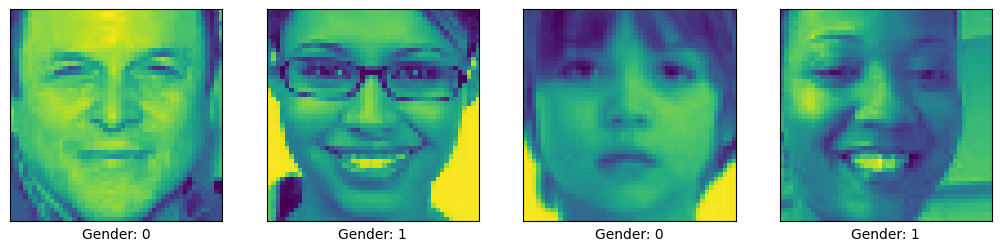

In [77]:
import numpy as np
import matplotlib.pyplot as plt

random_indices = np.random.randint(0, 23705, 23704)

plt.figure(figsize=(16, 16))
for i, a in zip(random_indices, range(1, 5)):
    plt.subplot(5, 5, a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel("Gender: " + str(Y.iloc[i]))

plt.show()

In [55]:
X.shape

(23705, 48, 48, 1)

In [56]:
def show_plot(x,index):
    plt.figure(figsize= (3,3))
    plt.imshow(x[index])

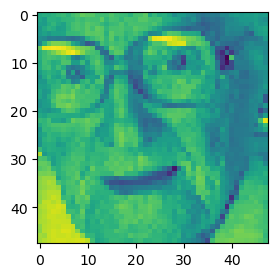

In [57]:
show_plot(X,23704)

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D

In [60]:
X = X /255

In [62]:
from sklearn.model_selection import train_test_split
y = data2["gender"]
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [63]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (16593, 48, 48, 1)
Shape of Y_train:  (16593,)
Shape of X_test:  (7112, 48, 48, 1)
Shape of Y_test:  (7112,)


In [64]:
data2

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...
23700,99,0,1,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,45 108 120 156 206 197 140 180 191 199 204 207...


In [65]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Fitting the model and obtaining the history
history = model.fit(X_train, Y_train, epochs=25, batch_size=32)



Epoch 1/25
519/519 [==============================] - 28s 51ms/step - loss: 0.4569 - accuracy: 0.7798
Epoch 2/25
519/519 [==============================] - 25s 49ms/step - loss: 0.3377 - accuracy: 0.8544
Epoch 3/25
519/519 [==============================] - 23s 44ms/step - loss: 0.3002 - accuracy: 0.8719
Epoch 4/25
519/519 [==============================] - 22s 42ms/step - loss: 0.2732 - accuracy: 0.8839
Epoch 5/25
519/519 [==============================] - 22s 42ms/step - loss: 0.2504 - accuracy: 0.8933
Epoch 6/25
519/519 [==============================] - 23s 44ms/step - loss: 0.2292 - accuracy: 0.9024
Epoch 7/25
519/519 [==============================] - 23s 43ms/step - loss: 0.2131 - accuracy: 0.9123
Epoch 8/25
519/519 [==============================] - 23s 45ms/step - loss: 0.1985 - accuracy: 0.9183
Epoch 9/25
519/519 [==============================] - 26s 51ms/step - loss: 0.1845 - accuracy: 0.9259
Epoch 10/25
519/519 [==============================] - 26s 51ms/step - loss: 0.171

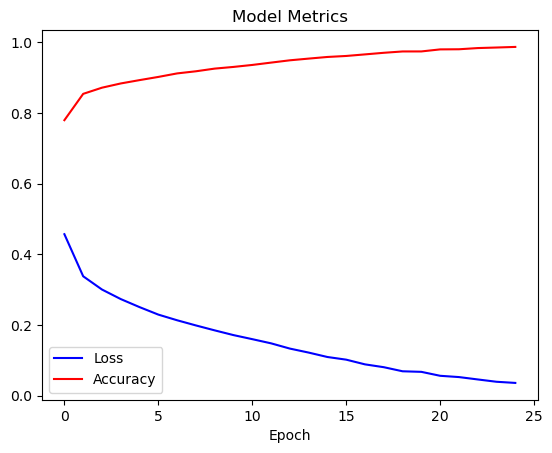

In [66]:
plt.plot(history.history['loss'], color='blue', label='Loss')
plt.plot(history.history['accuracy'], color='red', label='Accuracy')
plt.title('Model Metrics')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [67]:
predicted_labels = model.predict(X_test)

predicted_labels = np.argmax(predicted_labels, axis=1)

accuracy = np.mean(predicted_labels == Y_test)

print('Accuracy:', accuracy*100,"%")

223/223 [==============================] - 2s 10ms/step
Accuracy: 88.02024746906638 %


In [68]:
X_test.shape

(7112, 48, 48, 1)

In [69]:
Y_test.shape

(7112,)

In [70]:
Y_test= Y_test.to_numpy()

1/1 [==============================] - 0s 39ms/step

0 =====> Male
1 =====> Female

True Gender: 0
Predicted Gender: 0
prediction is correct It's a Male


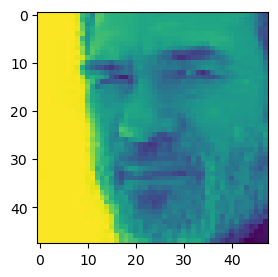

In [74]:
import numpy as np

random_index = np.random.randint(0, len(X_test)) 

test_image = X_test[random_index]

true_label = Y_test[random_index]

test_image = np.expand_dims(test_image, axis=0)

prediction = model.predict(test_image)

predicted_label = np.argmax(prediction)

print()


print("0 =====> Male")

print("1 =====> Female")

print()


print('True Gender:', true_label)

show_plot(X_test,random_index)

print('Predicted Gender:', predicted_label)


if(true_label == predicted_label == 0):

    print("prediction is correct It's a Male")

if(true_label == predicted_label == 1):

    print("prediction is correct it's Female")

if(predicted_label != true_label):
    
    print("prediction is wrong")

223/223 [==============================] - 2s 11ms/step


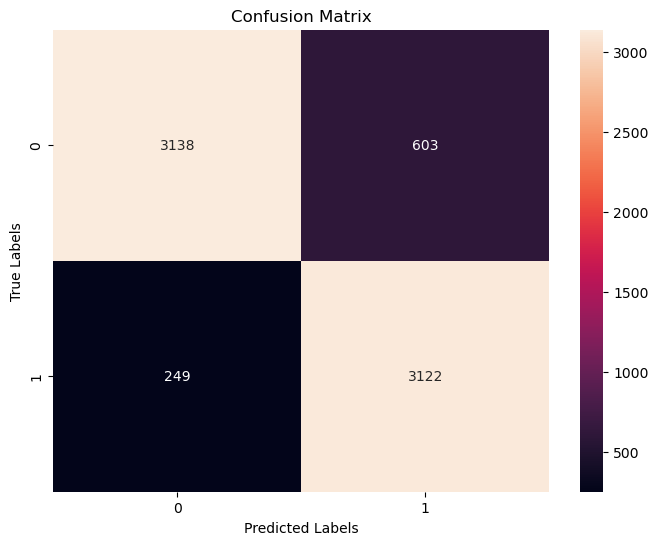

In [72]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predicting on all samples in X_test
predicted_labels = model.predict(X_test)
predicted_labels = np.argmax(predicted_labels, axis=1)


# Creating confusion matrix
cm = confusion_matrix(Y_test, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=[0,1], yticklabels=[0, 1])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()